In [1]:
# 패키지 불러오기
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.font_manager as fm

In [3]:
# 주피터 노트북 사용시 노트북 내부에 그림을 표시하도록 지정
%matplotlib inline

In [5]:
# 트렌드 영상에 오른 채널들 모든 영상 크롤링 데이터
total = pd.read_csv('C:/Users/김지희/DSL/dataset/channel_total.csv', lineterminator='\n')
trend_period = pd.read_csv('C:/Users/김지희/DSL/dataset/youtube_0723.csv', lineterminator='\n')
# 원래 데이터에서 모든 전처리가 완료된 데이터
trend = pd.read_csv('C:/Users/김지희/DSL/dataset/youtube_nodouble.csv', lineterminator='\n')
trend_unique = pd.read_csv('C:/Users/김지희/DSL/dataset/youtube_nodouble_unique.csv', lineterminator='\n')

In [6]:
import matplotlib.font_manager as fm
path = 'C:\\Windows\\Fonts\\NanumBarunGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


In [7]:
total.head()
# trend.head()
# trend_period.head()

,channelId,video_time,video_id,when,title,minute_time,seconds_time,open,totalview,subscriber
0,UCu9BCtGIEr73LXZsKmoujKw,4:58,u6lyUnhaaqk,10일 전,.,4.966667,298.0,2014-08-25,2.683340e+09,3230000.0
1,UCu9BCtGIEr73LXZsKmoujKw,10:45,_LpMHqmScuk,8개월 전,판결 나왔습니다,10.750000,645.0,2014-08-25,2.683340e+09,3230000.0
2,UCu9BCtGIEr73LXZsKmoujKw,11:53,2eHrT-Fgs78,9개월 전,현재 재판진행상황,11.883333,713.0,2014-08-25,2.683340e+09,3230000.0
3,UCu9BCtGIEr73LXZsKmoujKw,9:41,6MiItImFYbk,9개월 전,우리 깐부 맞지?,9.683333,581.0,2014-08-25,2.683340e+09,3230000.0
4,UCu9BCtGIEr73LXZsKmoujKw,SHORTS,QdnvjTQ4X3c,9개월 전,섹드립논란#Shorts,NaN,NaN,2014-08-25,2.683340e+09,3230000.0


첫번째 하려는 것=> 트렌딩 데이터로 시간 정보를 불러오자!

트렌드 데이터로 선정되는 것과 영상 길이 간의 관련성이 있을까?

In [8]:
# 데이터를 merge 하기

trend_plus = pd.merge(trend_unique, total[['video_id', 'minute_time', 'seconds_time', 'totalview', 'subscriber']], left_on = 'video_id', right_on = 'video_id', how = 'left')

print(len(trend_plus['minute_time']))
print(trend_plus['minute_time'].isnull().sum())

16928
11885


In [9]:
pd.merge(trend_unique, trend_period[['video_id', 'distance']], left_on='video_id', right_on='video_id', how='right')


,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,comment_count,description,category_name,tag_num,period,Unnamed: 0,comments_disabled,ratings_disabled,distance
0,uq5LClQN3cE,안녕하세요 보겸입니다,2020-08-09 09:32:48,UCu9BCtGIEr73LXZsKmoujKw,보겸 BK,2020-08-18 00:00:00,보겸|bokyem,6879571,53705,115494,128860,NaN,Entertainment,2,7,950.0,False,False,3
1,I-ZbZCHsHD0,부락토스의 계획 [총몇명 프리퀄],2020-08-12 09:00:08,UCRuSxVu4iqTK5kCh90ntAgA,총몇명,2020-08-16 00:00:00,총몇명|재밌는 만화|부락토스|루시퍼|총몇명 프리퀄|총몇명 스토리,1683060,36185,767,4048,"오늘도 정말 감사드립니다!!총몇명 스튜디오 - 총몇명, 십제곱, 5G민, MOVE혁...",Film & Animation,6,5,656.0,False,False,0
2,9d7jNUjBoss,평생 반성하면서 살겠습니다.,2020-08-10 09:54:13,UCMVC92EOs9yDJG5JS-CMesQ,양팡 YangPang,2020-08-18 00:00:00,양팡|양팡유튜브|팡튜브|가족시트콤|양팡가족|양팡가족시트콤|양팡언니|현실남매|현실자매...,4419287,20455,91514,60021,NaN,People & Blogs,27,7,945.0,False,False,2
3,3pI_L3-sMVg,안녕하세요 꽈뚜룹입니다.,2020-08-11 15:00:58,UCkQCwnkQfgSuPTTnw_Y7v7w,꽈뚜룹 Quaddurup,2020-08-18 00:00:00,꽈뚜룹|한국여행기|quaddurup|뚜룹이|korea|southkorea|vlog|...,2272383,42105,2928,9900,앞으로 좀 더 깔끔한 영상제작 약속 드리겠습니다.늘 감사드립니다,Entertainment,12,7,953.0,False,False,1
4,zrsBjYukE8s,박진영 (J.Y. Park) When We Disco (Duet with 선미) M/V,2020-08-11 09:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,2020-08-19 00:00:00,JYP Entertainment|JYP|J.Y.Park|JYPark|박진영|선미|S...,12533252,516777,16047,32508,MelOn http://kko.to/TWyXd7zYjSpotify https://s...,Music,13,8,1085.0,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133536,3V9mAYiJQhg,탑건 코르키,2022-06-27 12:02:13,UCEu_YKdz0lMz1NkB3vlUyyw,승상싱,2022-07-11 00:00:00,[None],607612,8141,0,1051,만당주신 분 : 도움,Gaming,0,12,137536.0,False,False,3
133537,wHR4Ri2tT-0,[골프레슨] 왼팔동작과 가속하는 방향만 알아도 던지는 스윙 가능합니다!,2022-06-28 23:00:31,UCZSNhOLPx3q87ss_N-vsmSA,[골프맨]조윤성프로,2022-07-11 00:00:00,골프|골프레슨|golf|golf lesson|드라이버|아이언|골프맨|조윤성프로|골프...,841197,8254,0,184,조윤성프로 (호주PGA)Email: davidcho@pgamember.org.auI...,Sports,52,11,137537.0,False,False,3
133538,1BvHmtDOh6o,세용이랑 결혼 10주년 여행 눈물짜르륵..,2022-06-27 12:00:00,UCWuWpKhbGev8Za4J-jfdSXw,영기티비,2022-07-11 00:00:00,글램핑|캠핑여행|남자친구랑여행|홍영기|이세용|영기티비|데이트코스|여행추천,757676,14804,0,774,https://bit.ly/3n2lb5G영기가 추천하는 콤부차 🥰❤️,People & Blogs,8,12,137538.0,False,False,1
133539,JC6budcACNE,fromis_9 (프로미스나인) 'Stay This Way' Official MV,2022-06-27 08:58:10,UC3IZKseVpdzPSBaWxBxundA,HYBE LABELS,2022-07-11 00:00:00,HYBE|HYBE LABELS|하이브|하이브레이블즈,16745515,202098,0,13180,fromis_9 (프로미스나인) 'Stay This Way' Official MV#...,Music,4,14,137539.0,False,False,1


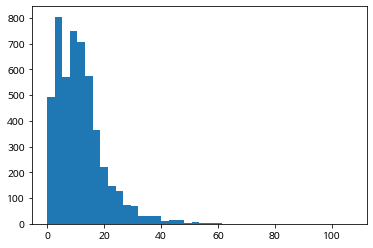

In [10]:
plt.hist(trend_plus['minute_time'], bins=40)
plt.show()

### 원래 데이터의 동영상 재생시간의 분포 확인

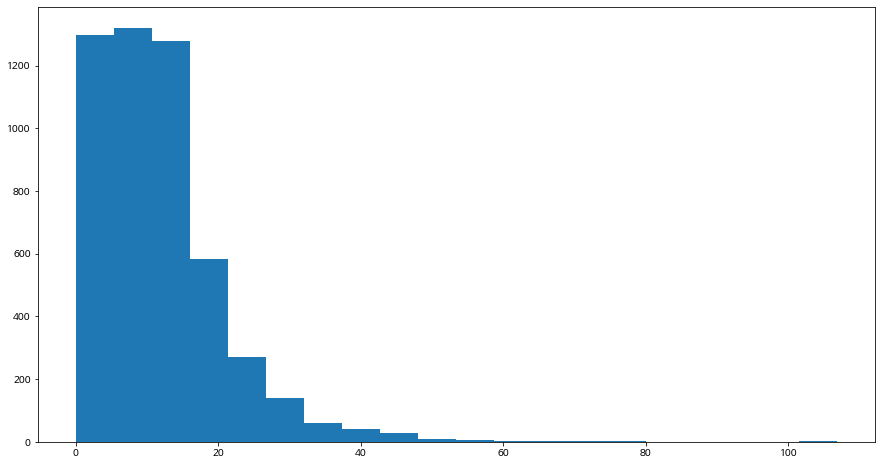

In [11]:
## 트렌드 동영상 재생시간의 분포 확인 => 이건 정확하다고 보기 어려움

plt.figure(figsize = (15,8))
plt.hist(trend_plus['minute_time'], bins=20)
plt.show()


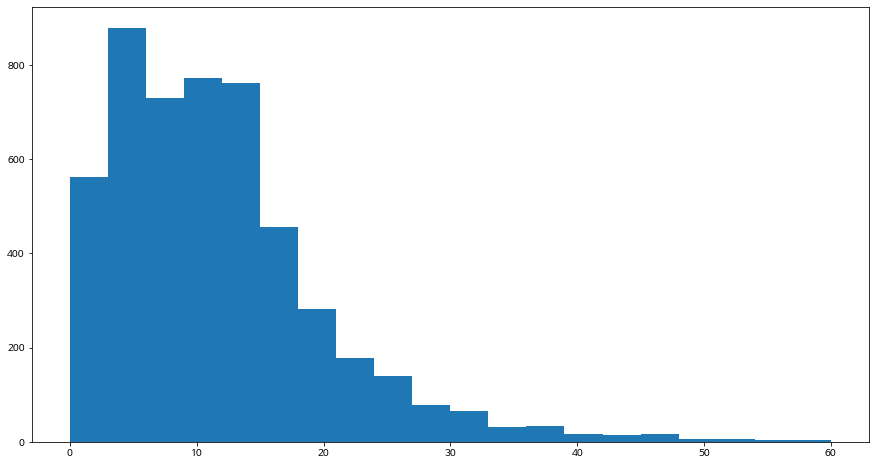

In [12]:
## 트렌드 동영상 재생시간의 분포 확인 => 이건 정확하다고 보기 어려움

plt.figure(figsize = (15,8))
plt.hist(trend_plus['minute_time'], bins=20, range = (0,60))
plt.show()


중앙값이 10분 정도에 위치하고 있고, 트렌드 영상으로 올라온 영상의 대부분이 20분 이내에 배치되어 있음을 확인할 수 있다.  
=> 영상시간이 길게 되면 트렌드 영상에 올라오지 못할 가능성이 커 보인다

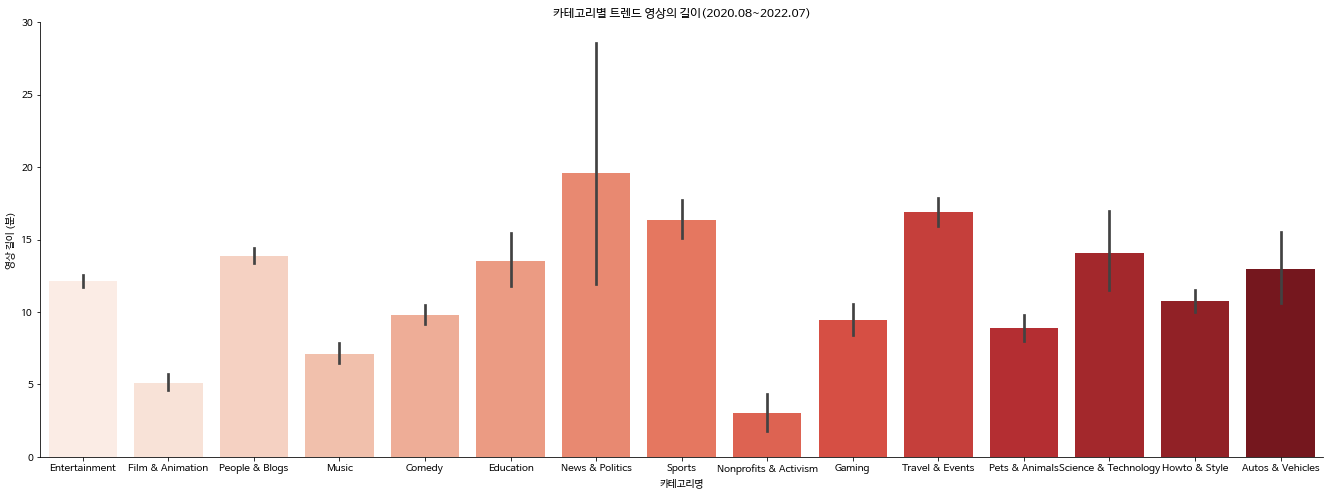

In [86]:
# 카테고리별로 트렌드 영상에 올라온 길이의 차이가 존재하나?
plt.figure(figsize = (23,8))
sns.barplot(data=trend_plus, x = 'category_name', y = 'minute_time', palette='Reds')
# plt.xticks(rotation=45)
sns.despine()
plt.title('카테고리별 트렌드 영상의 길이(2020.08~2022.07)', fontsize= 12)
plt.xlabel('카테고리명')
plt.ylabel('영상 길이 (분)')
plt.show()

News/Politics에 속한 영상들이 가장 평균적인 영상길이가 길었고, 편차 또한 매우 큰 것으로 나오는데 속보를 전해주는 짧은 영상들과 한 사건을 쭉 설명하는 영상들이 있어서 그런게 아닌가 싶다.
film & animation의 경우 길이가 5분대 영상들이 위치했는데 그 이유는 5분 정도의 짧은 애니메이션들이 인기동영상에 많이 올라와서 그런 것 같다. (ex. 총몇명, 짤툰,....)

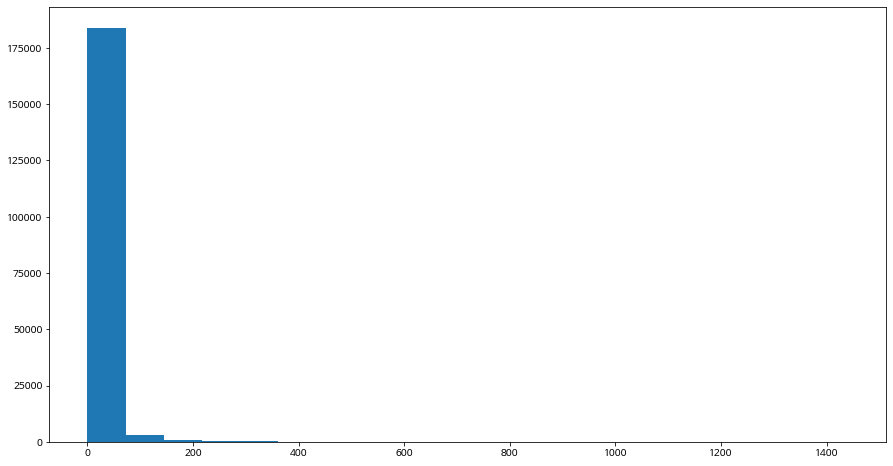

In [14]:
# total data에서 재생 시간 분포 확인하기

plt.figure(figsize = (15,8))
plt.hist(total['minute_time'], bins=20)
plt.show()


거의 대부분 영상 길이가 짧으나 일부 긴 영상들이 존재하고 있어서 전체 영역을 가지고 그래프를 분석하기가 어려워 보인다.

영역을 지정해서 많은 자료들이 몰려있는 부분을 더 관찰해보려고 한다.

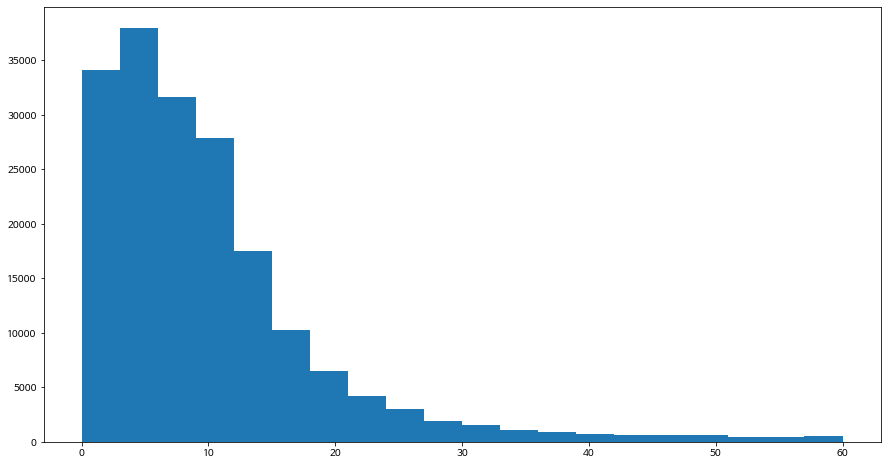

In [15]:
# total data에서 재생 시간 분포 확인하기

plt.figure(figsize = (15,8))
plt.hist(total['minute_time'], bins=20, range = (0, 60))
plt.show()


트렌드 데이터셋과 분포가 상당히 유사한 형태이지만 10~20분 구간의 경우 트렌드 데이터의 경우 더 많게 나왔다.

# 채널별로 동영상을 올리는 간격의 분포 확인

In [16]:
# 자료 전처리 진행하기

total[total['channelId'] == 'UCu9BCtGIEr73LXZsKmoujKw'].head()

,channelId,video_time,video_id,when,title,minute_time,seconds_time,open,totalview,subscriber
0,UCu9BCtGIEr73LXZsKmoujKw,4:58,u6lyUnhaaqk,10일 전,.,4.966667,298.0,2014-08-25,2.683340e+09,3230000.0
1,UCu9BCtGIEr73LXZsKmoujKw,10:45,_LpMHqmScuk,8개월 전,판결 나왔습니다,10.750000,645.0,2014-08-25,2.683340e+09,3230000.0
2,UCu9BCtGIEr73LXZsKmoujKw,11:53,2eHrT-Fgs78,9개월 전,현재 재판진행상황,11.883333,713.0,2014-08-25,2.683340e+09,3230000.0
3,UCu9BCtGIEr73LXZsKmoujKw,9:41,6MiItImFYbk,9개월 전,우리 깐부 맞지?,9.683333,581.0,2014-08-25,2.683340e+09,3230000.0
4,UCu9BCtGIEr73LXZsKmoujKw,SHORTS,QdnvjTQ4X3c,9개월 전,섹드립논란#Shorts,NaN,NaN,2014-08-25,2.683340e+09,3230000.0


In [17]:
trend_plus[trend_plus['minute_time'] >60]

,video_id,title,publishedAt,channelId,channelTitle,trending_date,tags,view_count,likes,dislikes,...,category_name,tag_num,period,Unnamed: 0,comments_disabled,ratings_disabled,minute_time,seconds_time,totalview,subscriber
1044,AwcevO7sn3M,[타로카드/연애운] 9월 연애운,2020-09-06 08:08:44,UCty6wr0aE3QJ2RUqUZsgrmw,타로호랑,2020-09-11 00:00:00,타로카드|연애운,359287,11861,116,...,People & Blogs,2,3,4311.0,False,False,66.466667,3988.0,6.274911e+07,432000.0
1223,inf2QMgXETo,"[풀영상] 생방송 심야토론 0912-추미애 장관 논란, 어떻게 볼 것인가?",2020-09-13 10:23:49,UC8gCJEe6FFHdhZyul6zLeMQ,생방송심야토론,2020-09-17 00:00:00,생방송심야토론|KBS|심야토론|KBS시사|정관용|이슈|시사,78335,755,109,...,News & Politics,7,4,5147.0,False,False,70.650000,4239.0,6.610166e+06,38700.0
7272,JdBYVNuky1M,Apple Event — April 20,2021-04-20 18:05:50,UCE_M8A5yxnLfW0KghEeajjw,Apple,2021-04-28 00:00:00,Apple|Apple Event|Apple Keynote|Apple Special ...,9341997,333361,9384,...,Science & Technology,28,8,48132.0,True,False,61.050000,3663.0,7.982467e+08,15900000.0
8465,0TD96VTf0Xs,WWDC 2021 — June 7 | Apple,2021-06-07 19:06:42,UCE_M8A5yxnLfW0KghEeajjw,Apple,2021-06-15 00:00:00,Apple|Apple Event|Apple Keynote|Apple Special ...,6513262,246626,6271,...,Science & Technology,24,7,59721.0,True,False,106.816667,6409.0,7.982467e+08,15900000.0
10735,EvGOlAkLSLw,Apple Event — September 14,2021-09-14 18:25:08,UCE_M8A5yxnLfW0KghEeajjw,Apple,2021-09-24 00:00:00,Apple|Apple Event|Apple Keynote|Apple Special ...,18280588,672190,18183,...,Science & Technology,8,10,79925.0,True,False,78.783333,4727.0,7.982467e+08,15900000.0
16349,1t0iJ7F_k9Q,BTS (방탄소년단) ‘찐 방탄회식’ #2022BTSFESTA,2022-06-14 12:00:10,UCLkAepWjdylmXSltofFvsYQ,BANGTANTV,2022-06-26 00:00:00,방탄소년단|BTS|BANGTAN|알엠|RM|슈가|SUGA|제이홉|jhope|지민|정...,18205587,2053494,0,...,Music,18,11,134518.0,False,False,61.933333,3716.0,1.728889e+10,69600000.0


In [18]:
# 전처리 하기 전 'when'의 형식을 확인해보자
total['when'].unique()

array(['10일 전', '8개월 전', '9개월 전', '10개월 전', '11개월 전', '1년 전', '6일 전',
       '13일 전', '2주 전', '1개월 전', '2개월 전', '3개월 전', '4개월 전', '5개월 전',
       '6개월 전', '7개월 전', '1일 전', '4일 전', '3주 전', '3일 전', '9일 전',
       '스트리밍 시간: 9개월 전', '20시간 전', '7일 전', '8일 전', '11일 전', '4주 전',
       '2일 전', '2년 전', '22시간 전', '12일 전', '29분 전', '5일 전', '8시간 전',
       '스트리밍 시간: 3개월 전', '스트리밍 시간: 4개월 전', '1시간 전', '4시간 전',
       '스트리밍 시간: 6일 전', '스트리밍 시간: 2주 전', '스트리밍 시간: 1개월 전',
       '스트리밍 시간: 2개월 전', '스트리밍 시간: 3일 전', '스트리밍 시간: 8일 전',
       '스트리밍 시간: 11일 전', '스트리밍 시간: 3주 전', '스트리밍 시간: 5개월 전',
       '스트리밍 시간: 6개월 전', '스트리밍 시간: 7개월 전', '스트리밍 시간: 9시간 전',
       '스트리밍 시간: 1일 전', '스트리밍 시간: 4일 전', '스트리밍 시간: 5일 전', '스트리밍 시간: 7일 전',
       '스트리밍 시간: 12일 전', '스트리밍 시간: 13일 전', '스트리밍 시간: 10개월 전', '49분 전',
       '18시간 전', '최초 공개일: 22. 7. 26. 19:00', '6시간 전', '스트리밍 시간: 11개월 전',
       '스트리밍 시간: 1년 전', '7시간 전', '3년 전', '5시간 전', '스트리밍 시간: 4주 전',
       '12시간 전', '스트리밍 시간: 47분 전', '47분 전', '2시간 전', '스트리밍 시간: 4시간 전',
   

In [19]:
# when의 형식을 바꾸는 함수 만들기
def replace_text(text): 
    if '초 전' in text:
        return int(text.replace('초 전', '')) * 0
    if '분 전' in text:
        return int(text.replace('분 전', '')) * 0
    elif '시간 전' in text:
        return int(text.replace('시간 전', '')) * 0
    elif '일 전' in text:
        return int(text.replace('일 전', ''))
    elif '개월 전' in text:
        return int(text.replace('개월 전', '')) * 30
    elif '년 전' in text:
        return int(text.replace('년 전', '')) * 365


In [20]:
def convert_when(text):
    if '최초 공개일' in text:
        text = text.replace('최초 공개일: ', '')
        text = '20'+text
        now = datetime.datetime.now()
        text = pd.to_datetime(text)
        date_diff = now - text
        return date_diff.days
    elif '스트리밍 시간' in text:
        text = text.replace('스트리밍 시간: ', '')
        return replace_text(text)
    else:
        return replace_text(text)
    

In [21]:
# 열에 함수 적용하기
total['upload_time'] = total['when'].apply(convert_when)

In [22]:
# 성공적으로 완료!
total.head()

,channelId,video_time,video_id,when,title,minute_time,seconds_time,open,totalview,subscriber,upload_time
0,UCu9BCtGIEr73LXZsKmoujKw,4:58,u6lyUnhaaqk,10일 전,.,4.966667,298.0,2014-08-25,2.683340e+09,3230000.0,10.0
1,UCu9BCtGIEr73LXZsKmoujKw,10:45,_LpMHqmScuk,8개월 전,판결 나왔습니다,10.750000,645.0,2014-08-25,2.683340e+09,3230000.0,240.0
2,UCu9BCtGIEr73LXZsKmoujKw,11:53,2eHrT-Fgs78,9개월 전,현재 재판진행상황,11.883333,713.0,2014-08-25,2.683340e+09,3230000.0,270.0
3,UCu9BCtGIEr73LXZsKmoujKw,9:41,6MiItImFYbk,9개월 전,우리 깐부 맞지?,9.683333,581.0,2014-08-25,2.683340e+09,3230000.0,270.0
4,UCu9BCtGIEr73LXZsKmoujKw,SHORTS,QdnvjTQ4X3c,9개월 전,섹드립논란#Shorts,NaN,NaN,2014-08-25,2.683340e+09,3230000.0,270.0


채널별로 기간을 분석을 하기 위해서 채널별로 when 열을 하나의 값으로 합치는 과정이 필요하다. 채택한 방법은 채널별로 when의 max값에서 min값을 빼고, 각 채널에 해당되는 영상수로 빼는 방법이다.

In [23]:
# 채널별로 max, min, count값을 생성하기
max_channel = total[['channelId', 'upload_time']].groupby(['channelId'], as_index=False).max()
min_channel = total[['channelId', 'upload_time']].groupby(['channelId'], as_index=False).min()
count_channel = total[['channelId', 'upload_time']].groupby(['channelId'], as_index=False).count()
print(max_channel.head())
print(min_channel.head())
print(count_channel.head())

                  channelId  upload_time
0  UC-0229MiVYnQoUxdLJnFl_g        365.0
1  UC-0C8yVGJy-cS4FGlYKelWw         60.0
2  UC-0tICWyA0_AJAVMBHL8GdQ        365.0
3  UC-2Y8dQb0S6DtpxNgAKoJKA         13.0
4  UC-2wa6jvprl7hfCpvw0ULzg        365.0
                  channelId  upload_time
0  UC-0229MiVYnQoUxdLJnFl_g          6.0
1  UC-0C8yVGJy-cS4FGlYKelWw          0.0
2  UC-0tICWyA0_AJAVMBHL8GdQ          0.0
3  UC-2Y8dQb0S6DtpxNgAKoJKA          0.0
4  UC-2wa6jvprl7hfCpvw0ULzg          5.0
                  channelId  upload_time
0  UC-0229MiVYnQoUxdLJnFl_g           60
1  UC-0C8yVGJy-cS4FGlYKelWw           75
2  UC-0tICWyA0_AJAVMBHL8GdQ           86
3  UC-2Y8dQb0S6DtpxNgAKoJKA           80
4  UC-2wa6jvprl7hfCpvw0ULzg           90


In [24]:
# 채널에 대한 max, min, upload_count 값을 하나의 dataframe으로 만들기
number_frame = pd.merge(max_channel, min_channel, left_on='channelId', right_on='channelId', how='outer')
number_frame = pd.merge(number_frame, count_channel, left_on='channelId', right_on='channelId', how='outer')

In [25]:
number_frame.columns = ['channelId', 'upload_max', 'upload_min','upload_count']

In [26]:
number_frame

,channelId,upload_max,upload_min,upload_count
0,UC-0229MiVYnQoUxdLJnFl_g,365.0,6.0,60
1,UC-0C8yVGJy-cS4FGlYKelWw,60.0,0.0,75
2,UC-0tICWyA0_AJAVMBHL8GdQ,365.0,0.0,86
3,UC-2Y8dQb0S6DtpxNgAKoJKA,13.0,0.0,80
4,UC-2wa6jvprl7hfCpvw0ULzg,365.0,5.0,90
...,...,...,...,...
2631,UCzpOLMBZ6qxhb6GJ5eksq5A,365.0,0.0,88
2632,UCzteSXznVjwESizsCcSKSWw,60.0,0.0,66
2633,UCzxXBQnJy9guqVNM6KXi0Ig,365.0,2.0,88
2634,UCzz58-H0wzmGoFi3MO_9ePQ,120.0,4.0,89


In [27]:
# 평균 기간에 대한 열을 만들기
number_frame['mean_period'] = (number_frame['upload_max'] - number_frame['upload_min'])/number_frame['upload_count']

In [28]:
number_frame

,channelId,upload_max,upload_min,upload_count,mean_period
0,UC-0229MiVYnQoUxdLJnFl_g,365.0,6.0,60,5.983333
1,UC-0C8yVGJy-cS4FGlYKelWw,60.0,0.0,75,0.800000
2,UC-0tICWyA0_AJAVMBHL8GdQ,365.0,0.0,86,4.244186
3,UC-2Y8dQb0S6DtpxNgAKoJKA,13.0,0.0,80,0.162500
4,UC-2wa6jvprl7hfCpvw0ULzg,365.0,5.0,90,4.000000
...,...,...,...,...,...
2631,UCzpOLMBZ6qxhb6GJ5eksq5A,365.0,0.0,88,4.147727
2632,UCzteSXznVjwESizsCcSKSWw,60.0,0.0,66,0.909091
2633,UCzxXBQnJy9guqVNM6KXi0Ig,365.0,2.0,88,4.125000
2634,UCzz58-H0wzmGoFi3MO_9ePQ,120.0,4.0,89,1.303371


In [29]:
number_frame = pd.merge(number_frame, trend_unique[['channelId', 'category_name']], left_on = 'channelId', right_on = 'channelId', how= 'right')
number_frame

,channelId,upload_max,upload_min,upload_count,mean_period,category_name
0,UCu9BCtGIEr73LXZsKmoujKw,365.0,10.0,60.0,5.916667,Entertainment
1,UCRuSxVu4iqTK5kCh90ntAgA,365.0,6.0,89.0,4.033708,Film & Animation
2,UCMVC92EOs9yDJG5JS-CMesQ,150.0,1.0,84.0,1.773810,People & Blogs
3,UCkQCwnkQfgSuPTTnw_Y7v7w,365.0,3.0,89.0,4.067416,Entertainment
4,UCaO6TYtlC8U5ttz62hTrZgg,240.0,0.0,80.0,3.000000,Music
...,...,...,...,...,...,...
16923,UCw1DsweY9b2AKGjV4kGJP1A,9.0,0.0,90.0,0.100000,Gaming
16924,UCw1DsweY9b2AKGjV4kGJP1A,9.0,0.0,90.0,0.100000,Gaming
16925,UCLhgIX2L5ZCaWdlaxR_oTAg,240.0,1.0,82.0,2.914634,Film & Animation
16926,UCsXigGjbC_l4ttk-oahTfVg,1095.0,30.0,72.0,14.791667,Music


In [30]:
number_frame['mean_period'].describe()

count    15439.000000
mean         3.528153
std          6.784721
min          0.000000
25%          0.714286
50%          2.333333
75%          4.102273
max        342.500000
Name: mean_period, dtype: float64

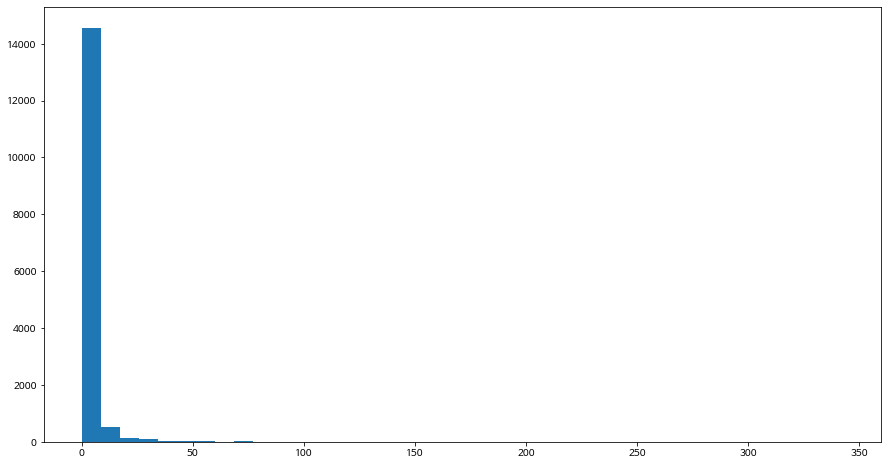

In [31]:
# 영상 업로드 간격 분포 확인하기

plt.figure(figsize = (15,8))
plt.hist(number_frame['mean_period'], bins= 40)
plt.show()

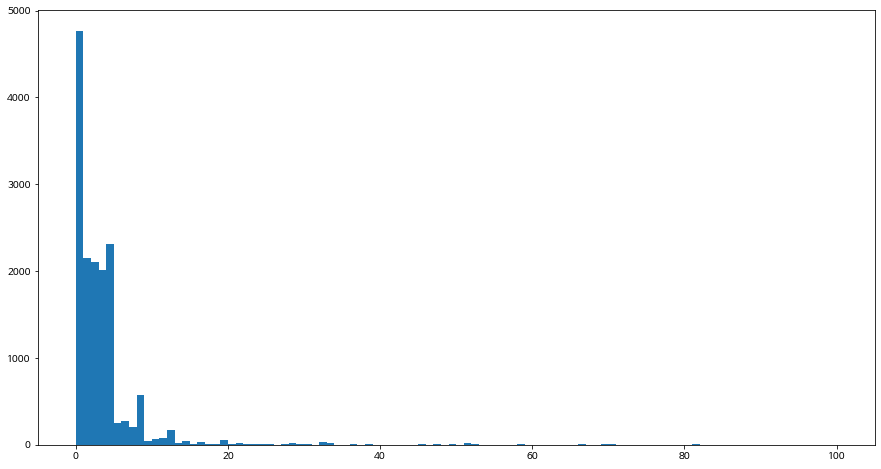

In [32]:
# 영역을 줄여보자
plt.figure(figsize = (15,8))
plt.hist(number_frame['mean_period'],  bins=100, range = (0, 100))
# plt.title('트렌드 영상 채널의 평균 업로드 기간')
plt.show()

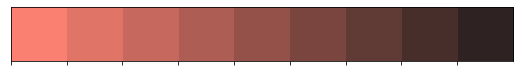

In [36]:
custom_palette = sns.color_palette("dark:salmon_r", 9)
sns.palplot(custom_palette)

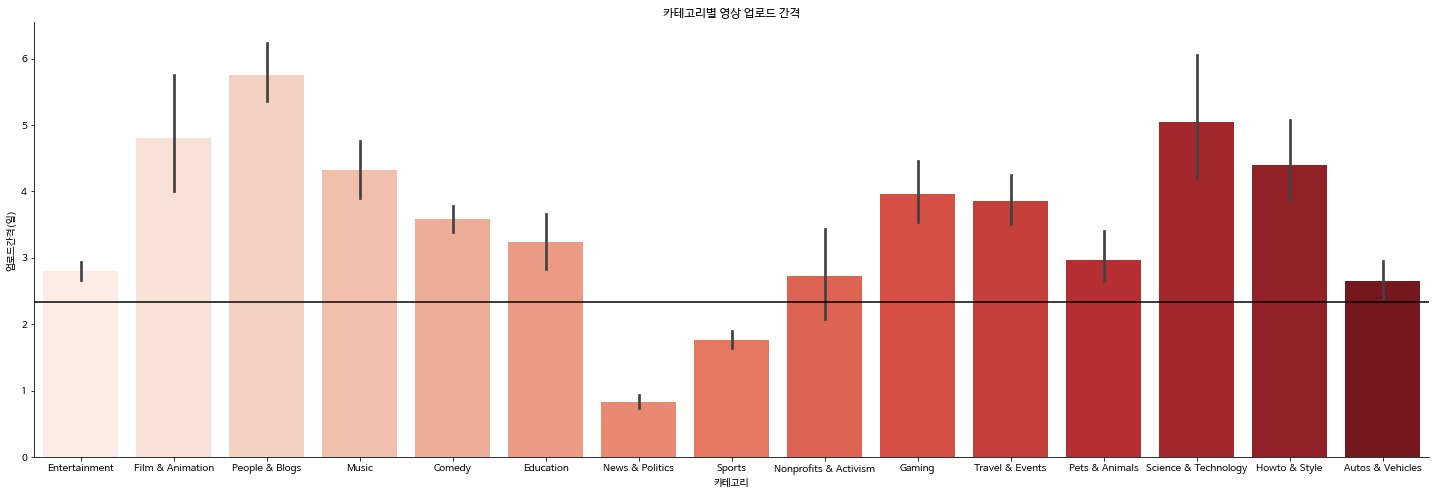

In [52]:
# 카테고리별 영상 업로드 차이 보기
plt.figure(figsize = (25,8))

sns.barplot(data=number_frame, x = 'category_name', y = 'mean_period', palette='Reds')
plt.axhline(y=2.3333, color='black', linestyle='solid')

# plt.xticks(fontsize = 12) 
plt.title('카테고리별 영상 업로드 간격')
plt.ylabel('업로드간격(일)')
plt.xlabel('카테고리')
sns.despine()
plt.show()